# Capstone II 
**Overview**: In this  application, I will compare the K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  Will train the model on obesity dataset in prdicting user's Classifiction {Insufficient_Weight,Normal_Weight,Overweight_Level_I,Overweight_Level_II,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III}. 


Data: https://www.kaggle.com/code/pmrich/obesitydataset-eda-data-prep-ml-hypertuning/input

ObesityDataSet_raw_and_data_sinthetic.csv



### Getting Started

Dataset comes from the  kaggle repository [link](https://www.kaggle.com/code/pmrich/obesitydataset-eda-data-prep-ml-hypertuning/input).

This Dataset has the following features


Attribute | Type | Meaning
:------: | :------: | :------:
Gender   | {"Female","Male"}  |
Age| int |
Height | mètre |
Weight | kg |
Family history w/ overweight | {"yes","no"} |
Frequent consumption of high caloric food (FAVC) |{"yes","no"} |
Frequency of consumption of vegetables (FCVC)| 1, 2, 3| 1:Never; 2:Sometimes; 3:Always
Number of main meals (NCP)| 1, 2, 3, 4 |
Consumption of food between meals (CAEC)| {"No","Sometimes","Frequently","Always"} |
Smoke | {"yes","no"} |
Consumption of water daily (CH2O)| 1, 2, 3 |1:Less than a liter;  2:Between 1 and 2L;  3:More than 2L
Calories consumption monitoring (SCC)| {"yes","no"} |
Physical activity frequency (FAF) | 0, 1, 2, 3 | 0:None; 1:1 or 2 days; 2:2 or 4 days; 3:4 or 5 days
Time using technology devices (TUE) | 0, 1, 2 | 0:0-2 hours; 1:3-5 hours; 2:More than 5 hours
Consumption of alcohol (CALC)| {"No","Sometimes","Frequently","Always"}
Transportation used (MTRANS) | {"Automobile","Bike","Motorbike","Public_Transportation","Walking"} |
NObesity | {"Insufficient Weight", "Normal Weight", "Overweight Level I", "Overweight Level II", "Obesity Type I", "Obesity Type II", "Obesity Type III"}|

In [1]:
import time
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

import warnings

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report


Read In the data

In [2]:
df = pd.read_csv('data/ObesityDataSet_raw_and_data_sinthetic.csv', sep = ',')

In [3]:
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [4]:
plt.rcParams['figure.figsize'] = [15, 6] # Graph size in inches
plt.rcParams['figure.dpi'] = 200 # resolution in dots per inch

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2110 entries, 0 to 2109
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2110 non-null   object 
 1   Age                             2110 non-null   float64
 2   Height                          2110 non-null   float64
 3   Weight                          2110 non-null   float64
 4   family_history_with_overweight  2110 non-null   object 
 5   FAVC                            2110 non-null   object 
 6   FCVC                            2110 non-null   float64
 7   NCP                             2110 non-null   float64
 8   CAEC                            2110 non-null   object 
 9   SMOKE                           2110 non-null   object 
 10  CH2O                            2110 non-null   float64
 11  SCC                             2110 non-null   object 
 12  FAF                             21

In [6]:
#renaming Columns for readability
df.columns = ['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
       'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of food between meals', 'Smoke', 'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency', 'Time using technology devices',
       'Consumption of alcohol', 'Transportation used', 'Obesity']
df 

Gender        Age    Height      Weight Family History with Overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2105  Female  20.976842  1.710730  131.408528                            yes   
2106  Female  21.982942  1.748584  133.742943                            yes   
2107  Female  22.524036  1.752206  133.689352                            yes   
2108  Female  24.361936  1.739450  133.346641                            yes   
2109  Female  23.664709  1.738836  133.472641                            yes   

     Frequent consumption of high caloric food  \
0                                           no   
1                                           no   
2                                           no   
3                                           no   
4                                           no   
...                                        ...   
2105                                       yes   
2106                                       yes   
2107                                       yes   
2108                                       yes   
2109                                       yes   

      Frequency of consumption of vegetables  Number of main meals  \
0                                        2.0                   3.0   
1                                        3.0                   3.0   
2                                        2.0                   3.0   
3                                        3.0                   3.0   
4                                        2.0                   1.0   
...                                      ...                   ...   
2105                                     3.0                   3.0   
2106                                     3.0                   3.0   
2107                                     3.0                   3.0   
2108                                     3.0                   3.0   
2109                                     3.0                   3.0   

     Consumption of food between meals Smoke  Consumption of water daily  \
0                            Sometimes    no                    2.000000   
1                            Sometimes   yes                    3.000000   
2                            Sometimes    no                    2.000000   
3                            Sometimes    no                    2.000000   
4                            Sometimes    no                    2.000000   
...                                ...   ...                         ...   
2105                         Sometimes    no                    1.728139   
2106                         Sometimes    no                    2.005130   
2107                         Sometimes    no                    2.054193   
2108                         Sometimes    no                    2.852339   
2109                         Sometimes    no                    2.863513   

     Calories consumption monitoring  Physical activity frequency  \
0                                 no                     0.000000   
1                                yes                     3.000000   
2                                 no                     2.000000   
3                                 no                     2.000000   
4                                 no                     0.000000   
...                              ...                          ...   
2105                              no                     1.676269   
2106                              no                     1.341390   
2107                              no                     1.414209   


In [7]:
df.describe()

Age       Height       Weight  \
count  2110.000000  2110.000000  2110.000000   
mean     24.314170     1.701678    86.596288   
std       6.347063     0.093327    26.193161   
min      14.000000     1.450000    39.000000   
25%      19.946718     1.630000    65.620230   
50%      22.783646     1.700563    83.000000   
75%      26.000000     1.768479   107.456672   
max      61.000000     1.980000   173.000000   

       Frequency of consumption of vegetables  Number of main meals  \
count                             2110.000000           2110.000000   
mean                                 2.419242              2.686427   
std                                  0.533975              0.777357   
min                                  1.000000              1.000000   
25%                                  2.000000              2.660328   
50%                                  2.386464              3.000000   
75%                                  3.000000              3.000000   
max                                  3.000000              4.000000   

       Consumption of water daily  Physical activity frequency  \
count                 2110.000000                  2110.000000   
mean                     2.008015                     1.010303   
std                      0.613099                     0.850794   
min                      1.000000                     0.000000   
25%                      1.582010                     0.123045   
50%                      2.000000                     1.000000   
75%                      2.478129                     1.666821   
max                      3.000000                     3.000000   

       Time using technology devices  
count                     2110.00000  
mean                         0.65723  
std                          0.60837  
min                          0.00000  
25%                          0.00000  
50%                          0.62535  
75%                          1.00000  
max                          2.00000

In [8]:
df.isnull().sum() # no null values

Gender                                       0
Age                                          0
Height                                       0
Weight                                       0
Family History with Overweight               0
Frequent consumption of high caloric food    0
Frequency of consumption of vegetables       0
Number of main meals                         0
Consumption of food between meals            0
Smoke                                        0
Consumption of water daily                   0
Calories consumption monitoring              0
Physical activity frequency                  0
Time using technology devices                0
Consumption of alcohol                       0
Transportation used                          0
Obesity                                      0
dtype: int64

## Exploratory Data Analysis

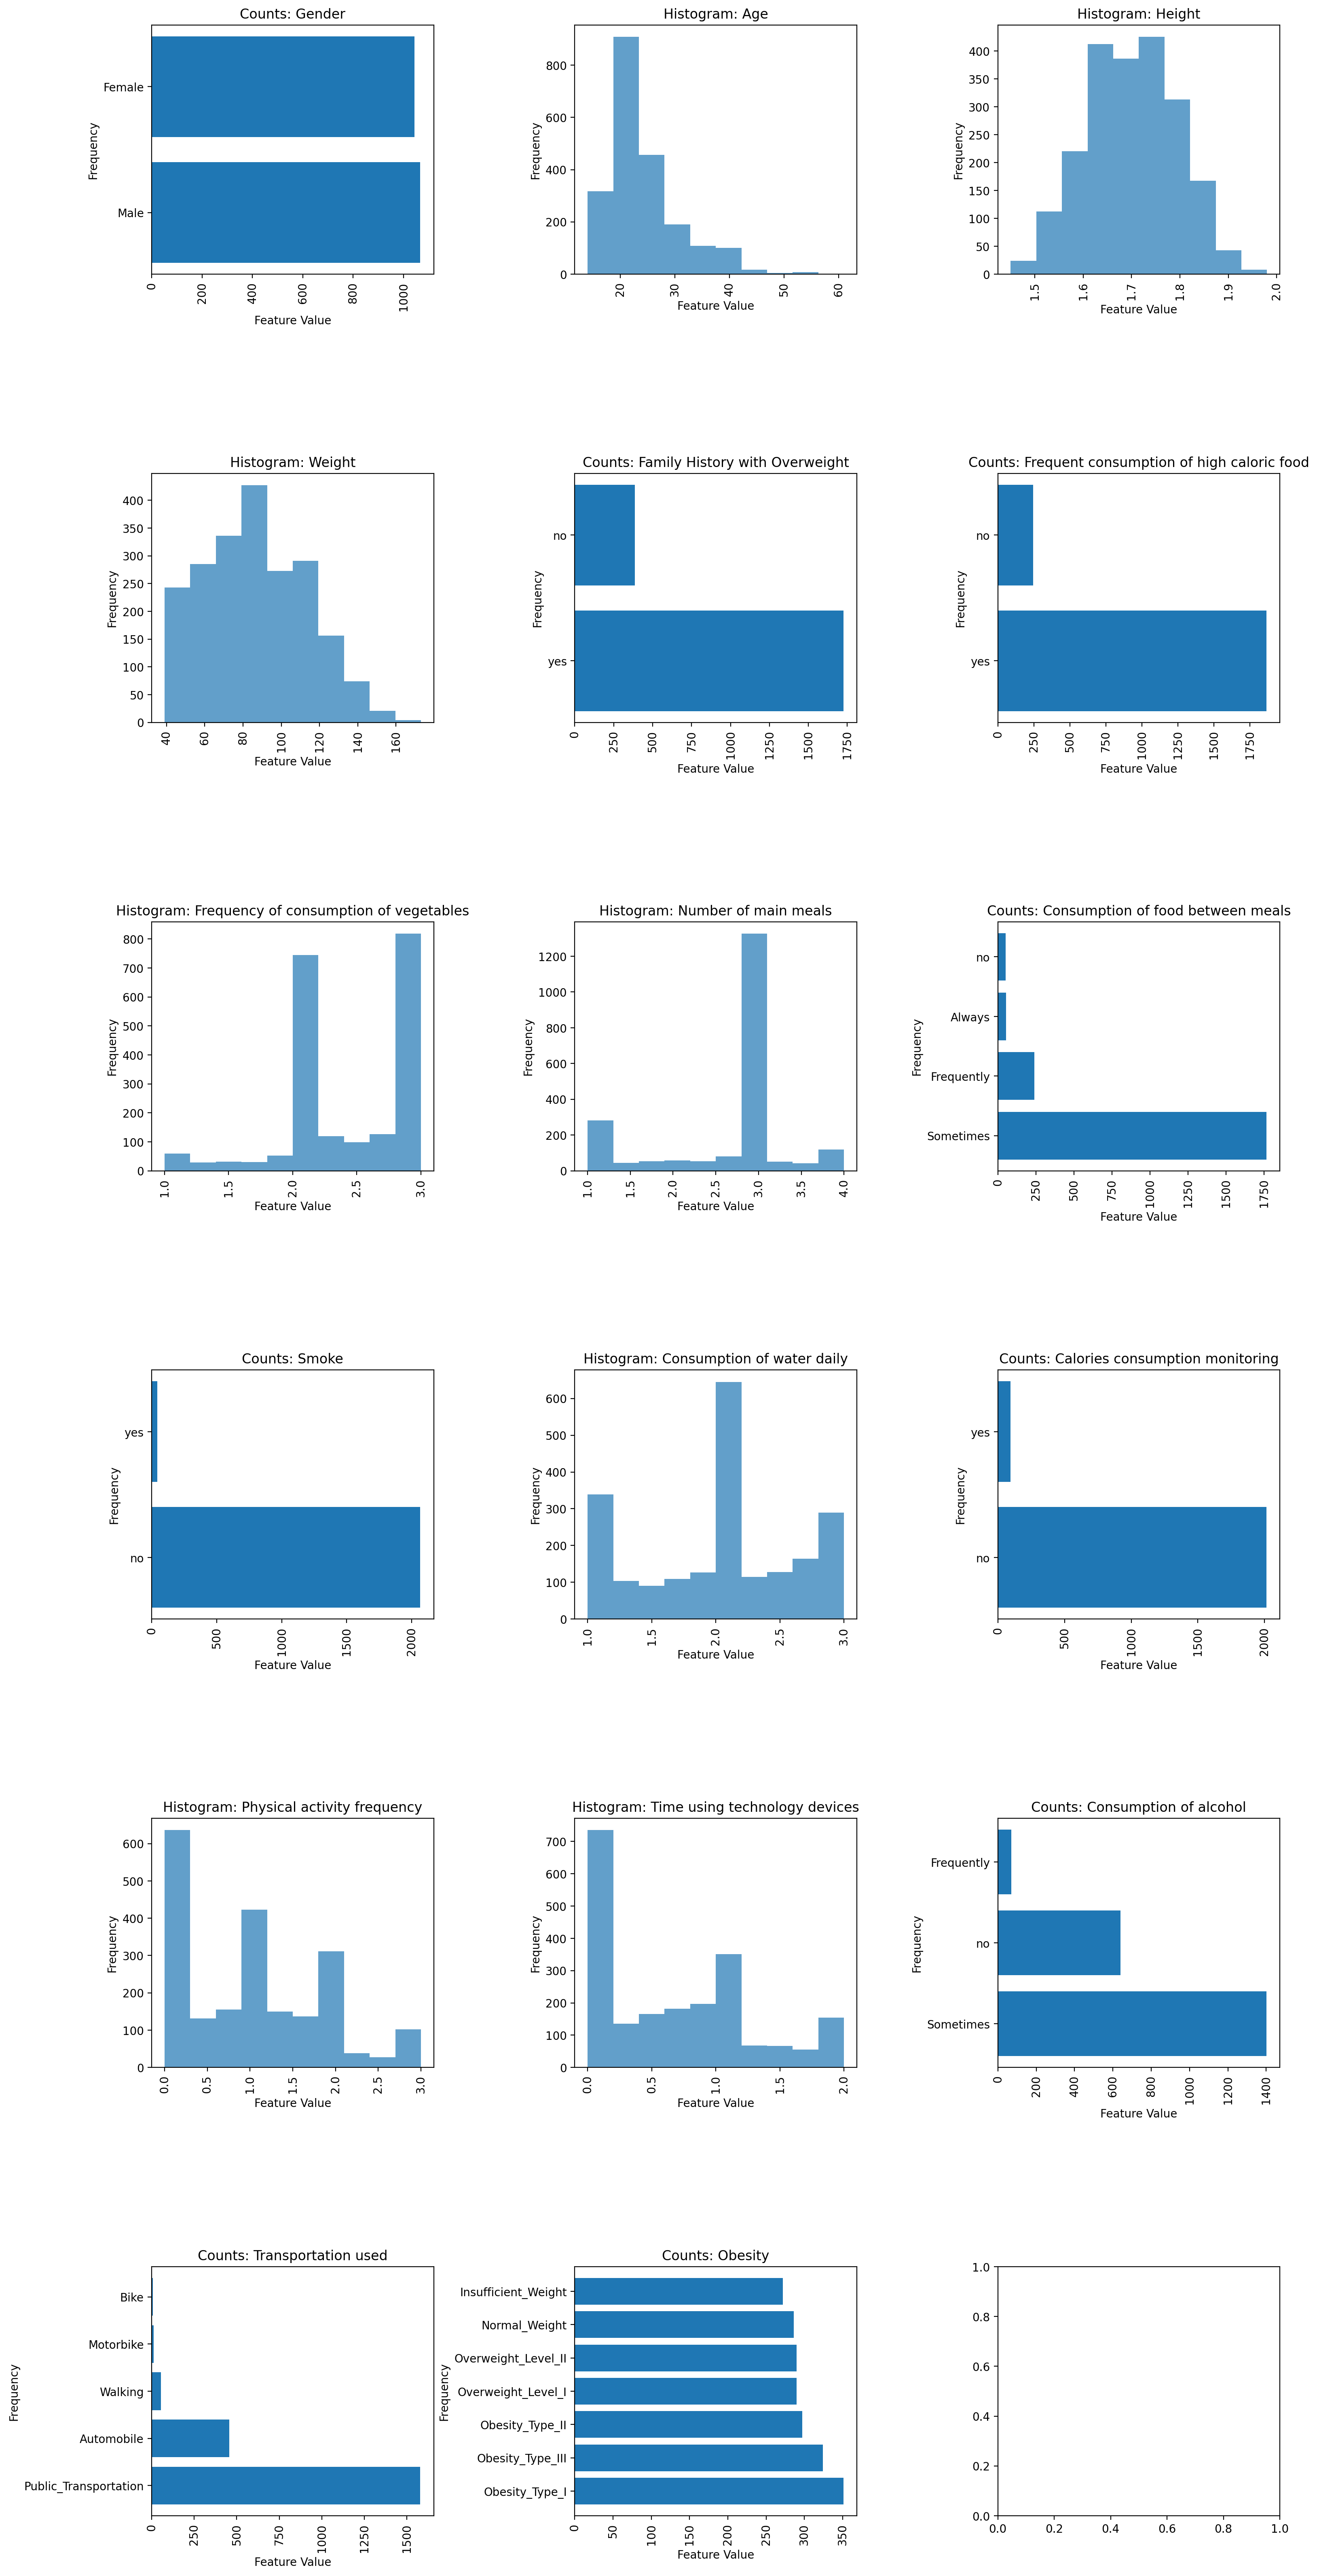

In [9]:

fig, axs = plt.subplots(6, 3, figsize=(18, 40))
catagorical = df.select_dtypes(['object']).columns.tolist()

for ax, column in zip(axs.flat, df.columns):
    if column in catagorical:
        category_counts = df[column].value_counts()
        categories = category_counts.index
        counts = category_counts.values
        ax.barh(categories, counts)
        ax.set_title(f'Counts: {column}')
    else:
        ax.hist(df[[column]], alpha=0.7)
        ax.set_title(f'Histogram: {column}')
    ax.set_xlabel('Feature Value')
    ax.set_ylabel('Frequency')
    for label in ax.get_xticklabels():
        label.set_rotation(90)

plt.subplots_adjust(hspace=0.8, wspace=0.5)
plt.show()

/var/folders/mz/f4t__z8j0wg56qd0wt_thwz40000gp/T/ipykernel_6195/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

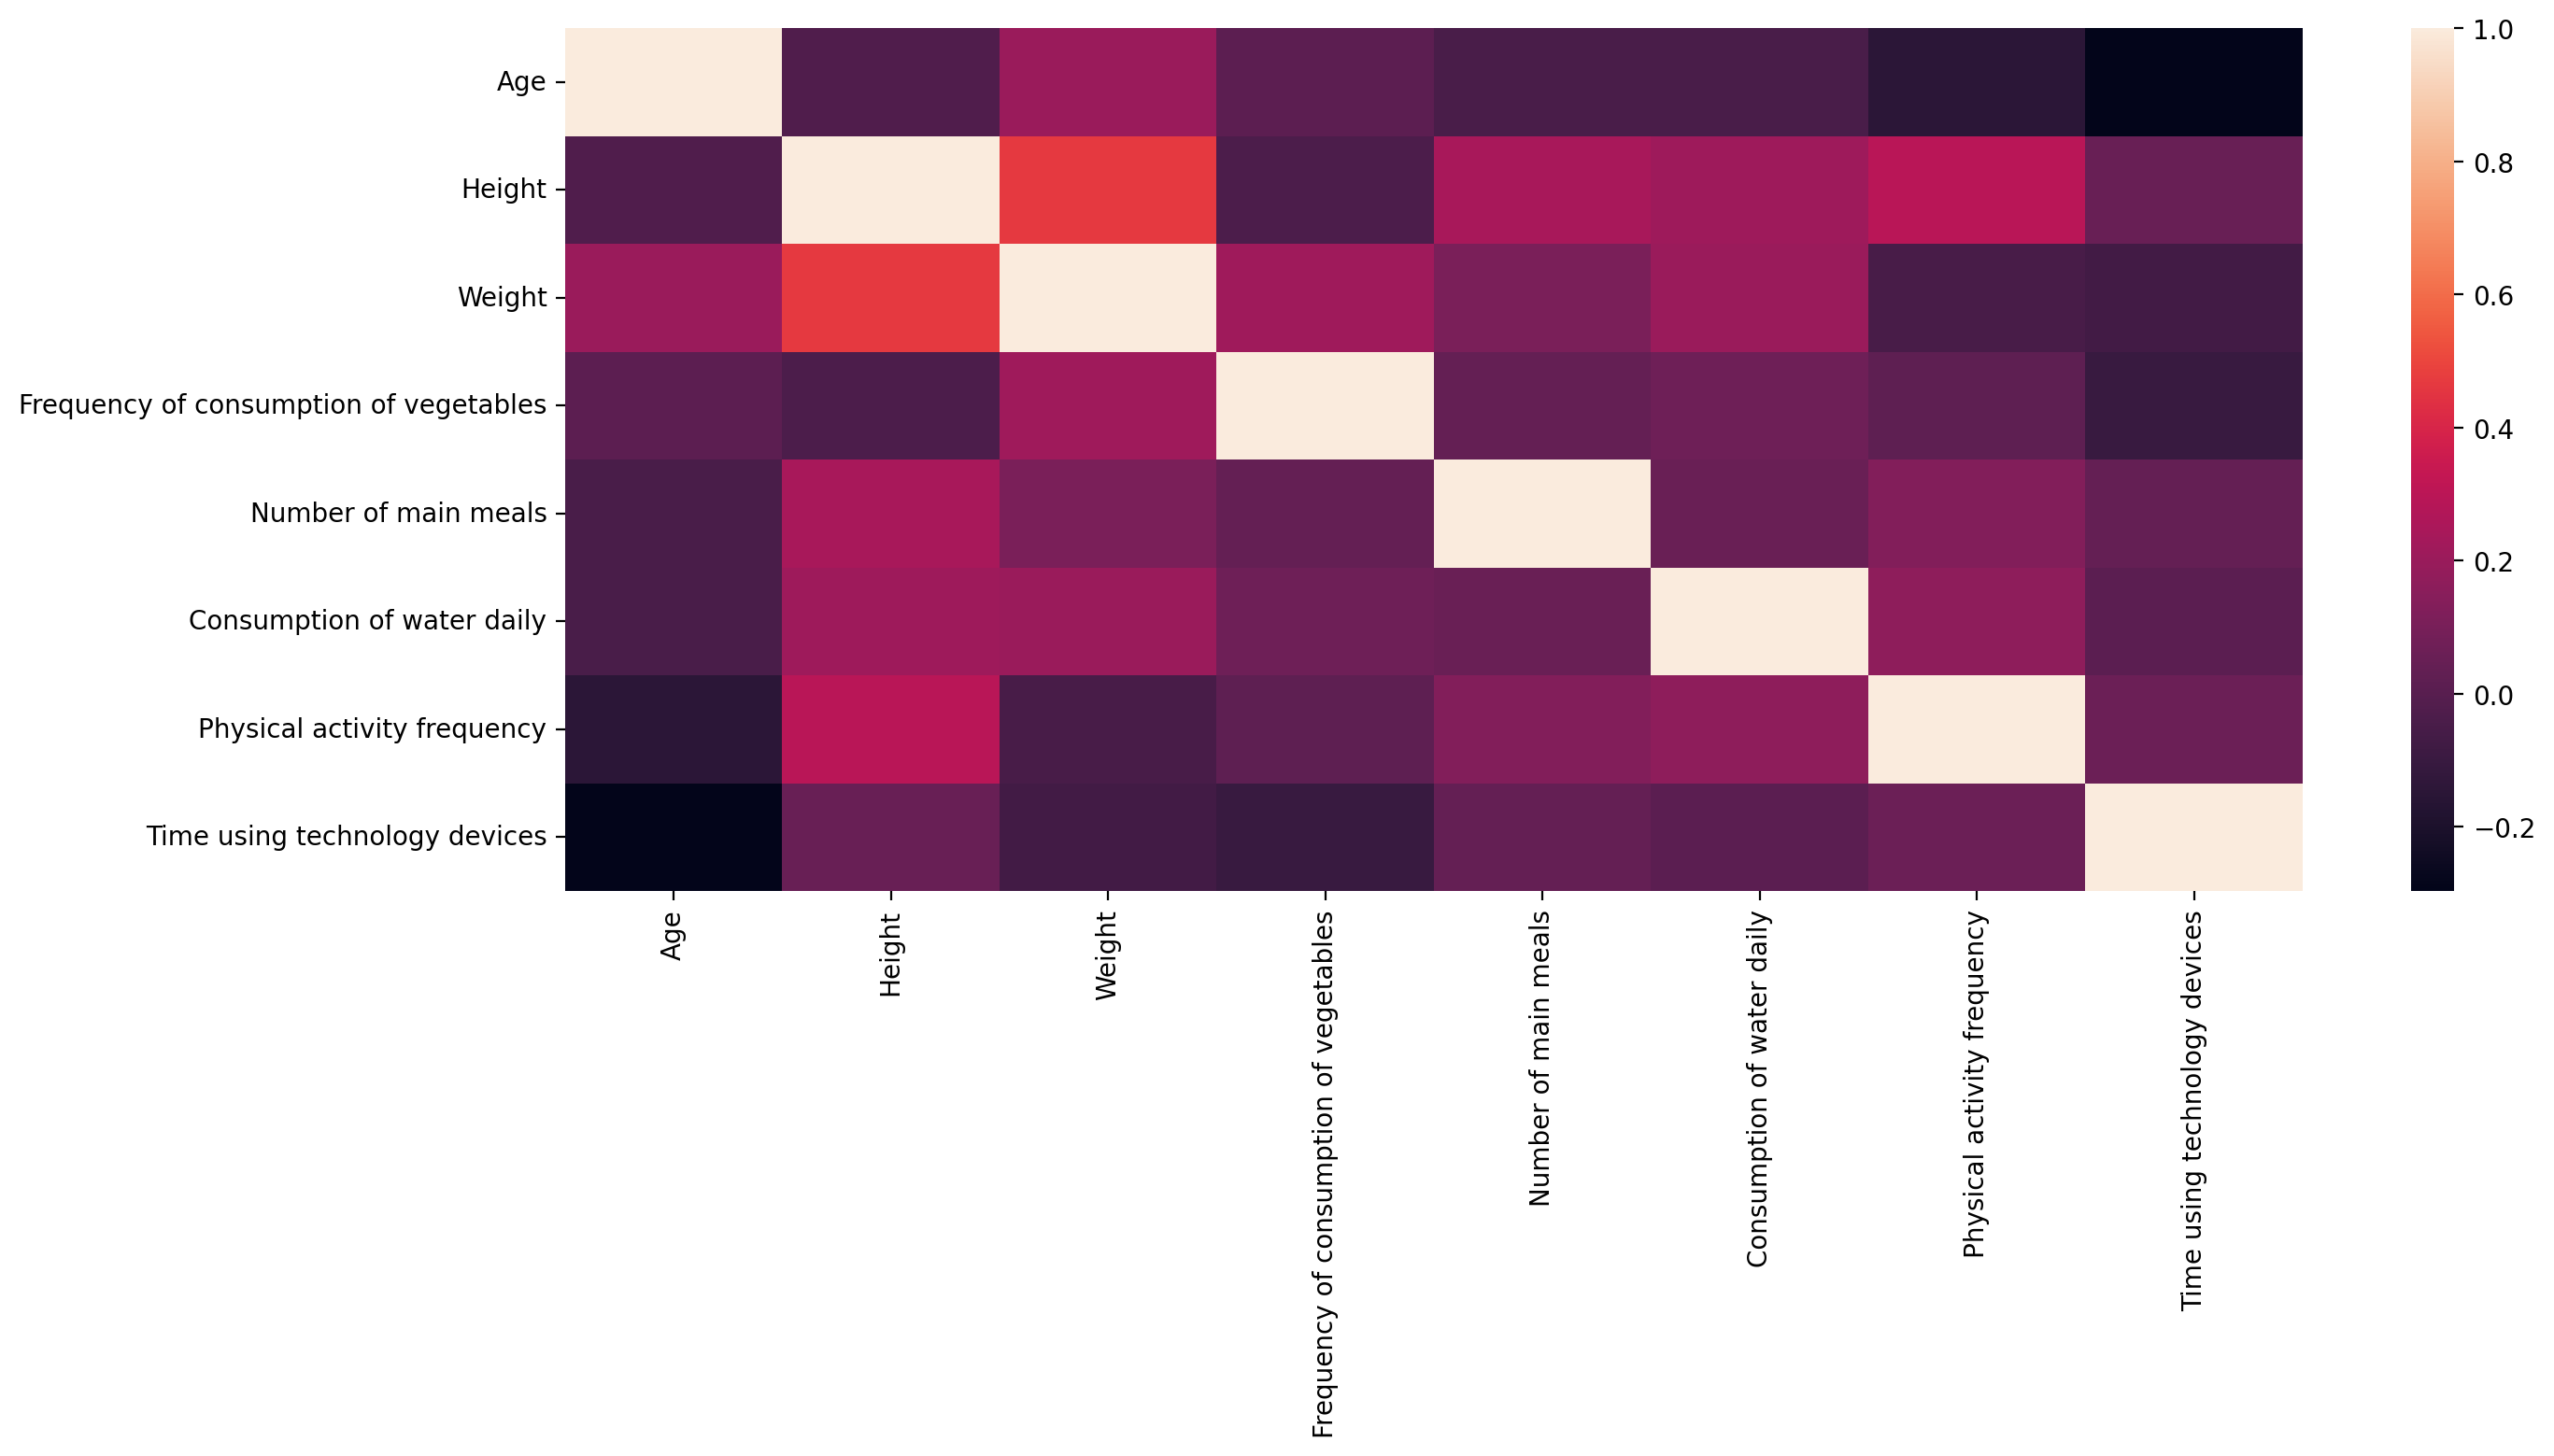

In [10]:
sns.heatmap(df.corr())

In [11]:
sns.pairplot(df)

In [ ]:
# Drop all unknown values
df_clean = df[~df.isin(['unknown']).any(axis=1)] # no unknows 

df_clean.shape[0] / df.shape[0] # no unknows 


In [ ]:
df_clean.dtypes

In [ ]:
df_clean.groupby("Number of main meals").Gender.count()  # Number of main meals (NCP)| 1, 2, 3, 4 |

In [ ]:
df_clean = df_clean.astype({"Age":'int', "Frequency of consumption of vegetables":'int', "Number of main meals":'int', "Consumption of water daily":'int', "Physical activity frequency":'int', "Time using technology devices":'int'})
df_clean = df_clean.round({"Height":2, "Weight":1})

# Data after process
df_clean.dtypes

In [ ]:
df_clean.groupby("Frequency of consumption of vegetables").Gender.count() #Frequent consumption of high caloric food (FAVC) |{"yes","no"} |

Frequency of consumption of vegetables
1     202
2    1256
3     652
Name: Gender, dtype: int64

In [ ]:
df_n=df_clean.copy() # adding a number column for grouping and pivot table graphs
df_n['t']=1
df_n

Gender  Age  Height  Weight Family History with Overweight  \
0     Female   21    1.62    64.0                            yes   
1     Female   21    1.52    56.0                            yes   
2       Male   23    1.80    77.0                            yes   
3       Male   27    1.80    87.0                             no   
4       Male   22    1.78    89.8                             no   
...      ...  ...     ...     ...                            ...   
2105  Female   20    1.71   131.4                            yes   
2106  Female   21    1.75   133.7                            yes   
2107  Female   22    1.75   133.7                            yes   
2108  Female   24    1.74   133.3                            yes   
2109  Female   23    1.74   133.5                            yes   

     Frequent consumption of high caloric food  \
0                                           no   
1                                           no   
2                                           no   
3                                           no   
4                                           no   
...                                        ...   
2105                                       yes   
2106                                       yes   
2107                                       yes   
2108                                       yes   
2109                                       yes   

      Frequency of consumption of vegetables  Number of main meals  \
0                                          2                     3   
1                                          3                     3   
2                                          2                     3   
3                                          3                     3   
4                                          2                     1   
...                                      ...                   ...   
2105                                       3                     3   
2106                                       3                     3   
2107                                       3                     3   
2108                                       3                     3   
2109                                       3                     3   

     Consumption of food between meals Smoke  Consumption of water daily  \
0                            Sometimes    no                           2   
1                            Sometimes   yes                           3   
2                            Sometimes    no                           2   
3                            Sometimes    no                           2   
4                            Sometimes    no                           2   
...                                ...   ...                         ...   
2105                         Sometimes    no                           1   
2106                         Sometimes    no                           2   
2107                         Sometimes    no                           2   
2108                         Sometimes    no                           2   
2109                         Sometimes    no                           2   

     Calories consumption monitoring  Physical activity frequency  \
0                                 no                            0   
1                                yes                            3   
2                                 no                            2   
3                                 no                            2   
4                                 no                            0   
...                              ...                          ...   
2105                              no                            1   
2106                              no                            1   
2107                              no                            1   
2108                              no                            1   
2109                              no                            1   

     

Pivot Table with Gender vs Obesity type categorization  

In [ ]:
obesityVsGender = df_n.pivot_table('t',index="Obesity", columns="Gender", aggfunc=sum)
obesityVsGender

Gender               Female  Male
Obesity                          
Insufficient_Weight     173    99
Normal_Weight           141   145
Obesity_Type_I          156   195
Obesity_Type_II           2   295
Obesity_Type_III        323     1
Overweight_Level_I      145   145
Overweight_Level_II     103   187

<Axes: title={'center': 'Obesity vs Gender'}, xlabel='Obesity Index', ylabel='Individuals'>

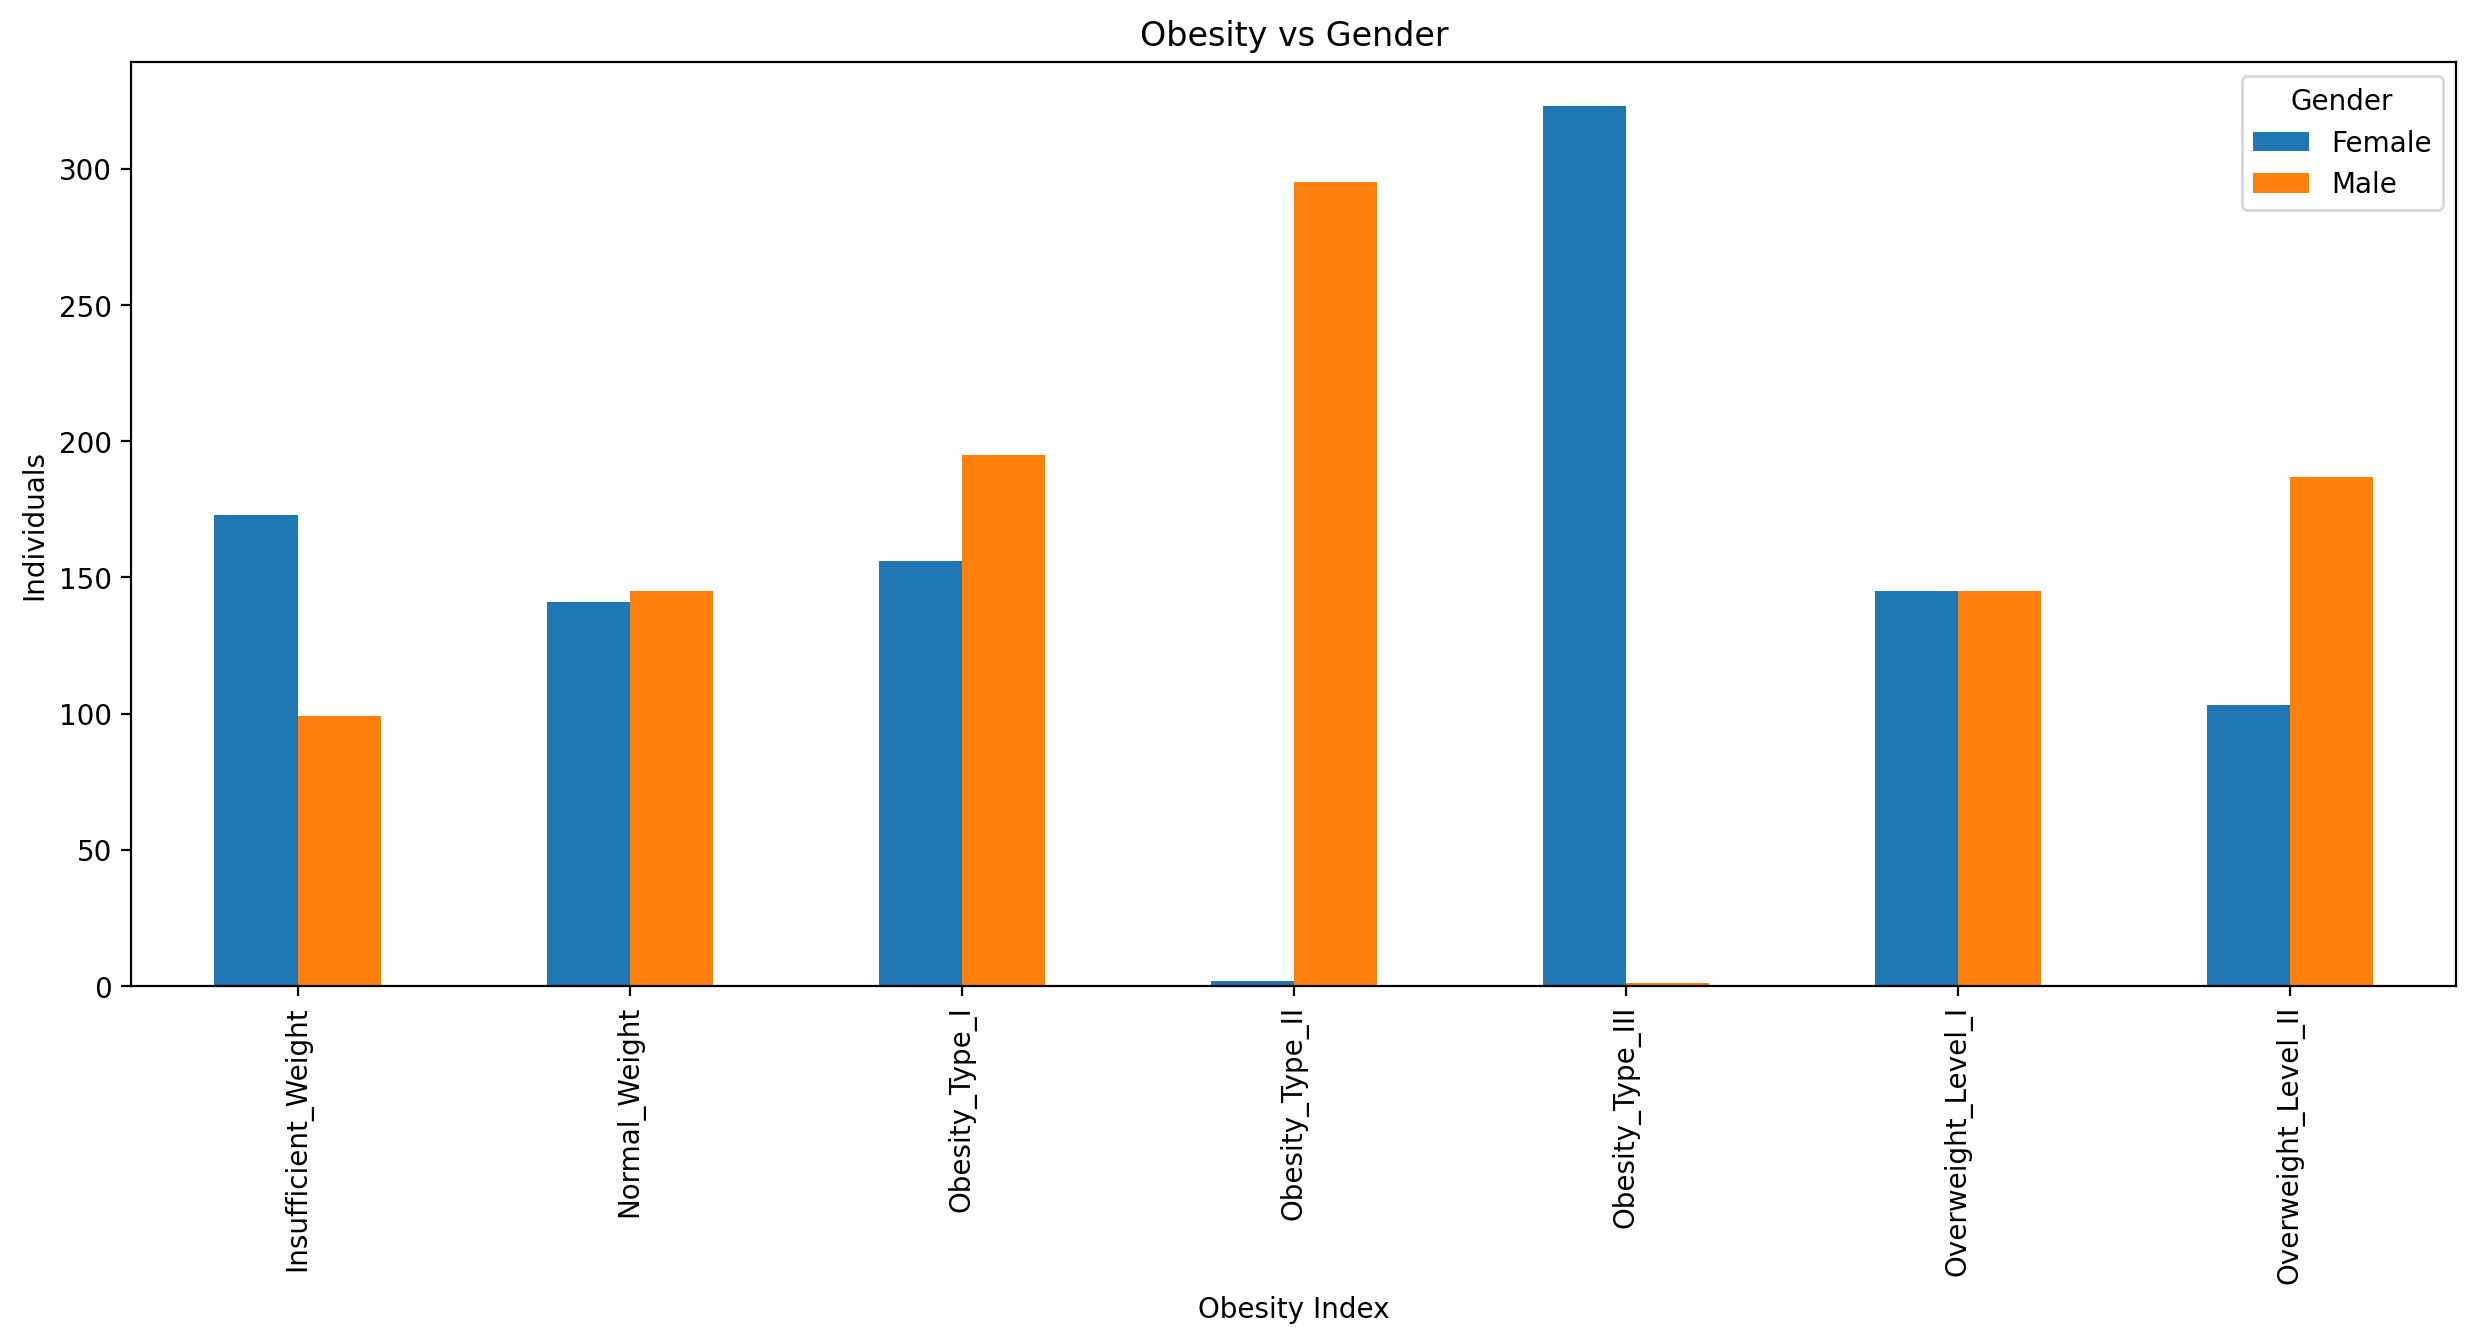

In [19]:
obesityVsGender.plot(xlabel='Obesity Index', ylabel="Individuals", kind="bar",title="Obesity vs Gender", label=True)

<Axes: title={'center': 'Obesity vs Gender'}, xlabel='Obesity Index', ylabel='Individuals'>

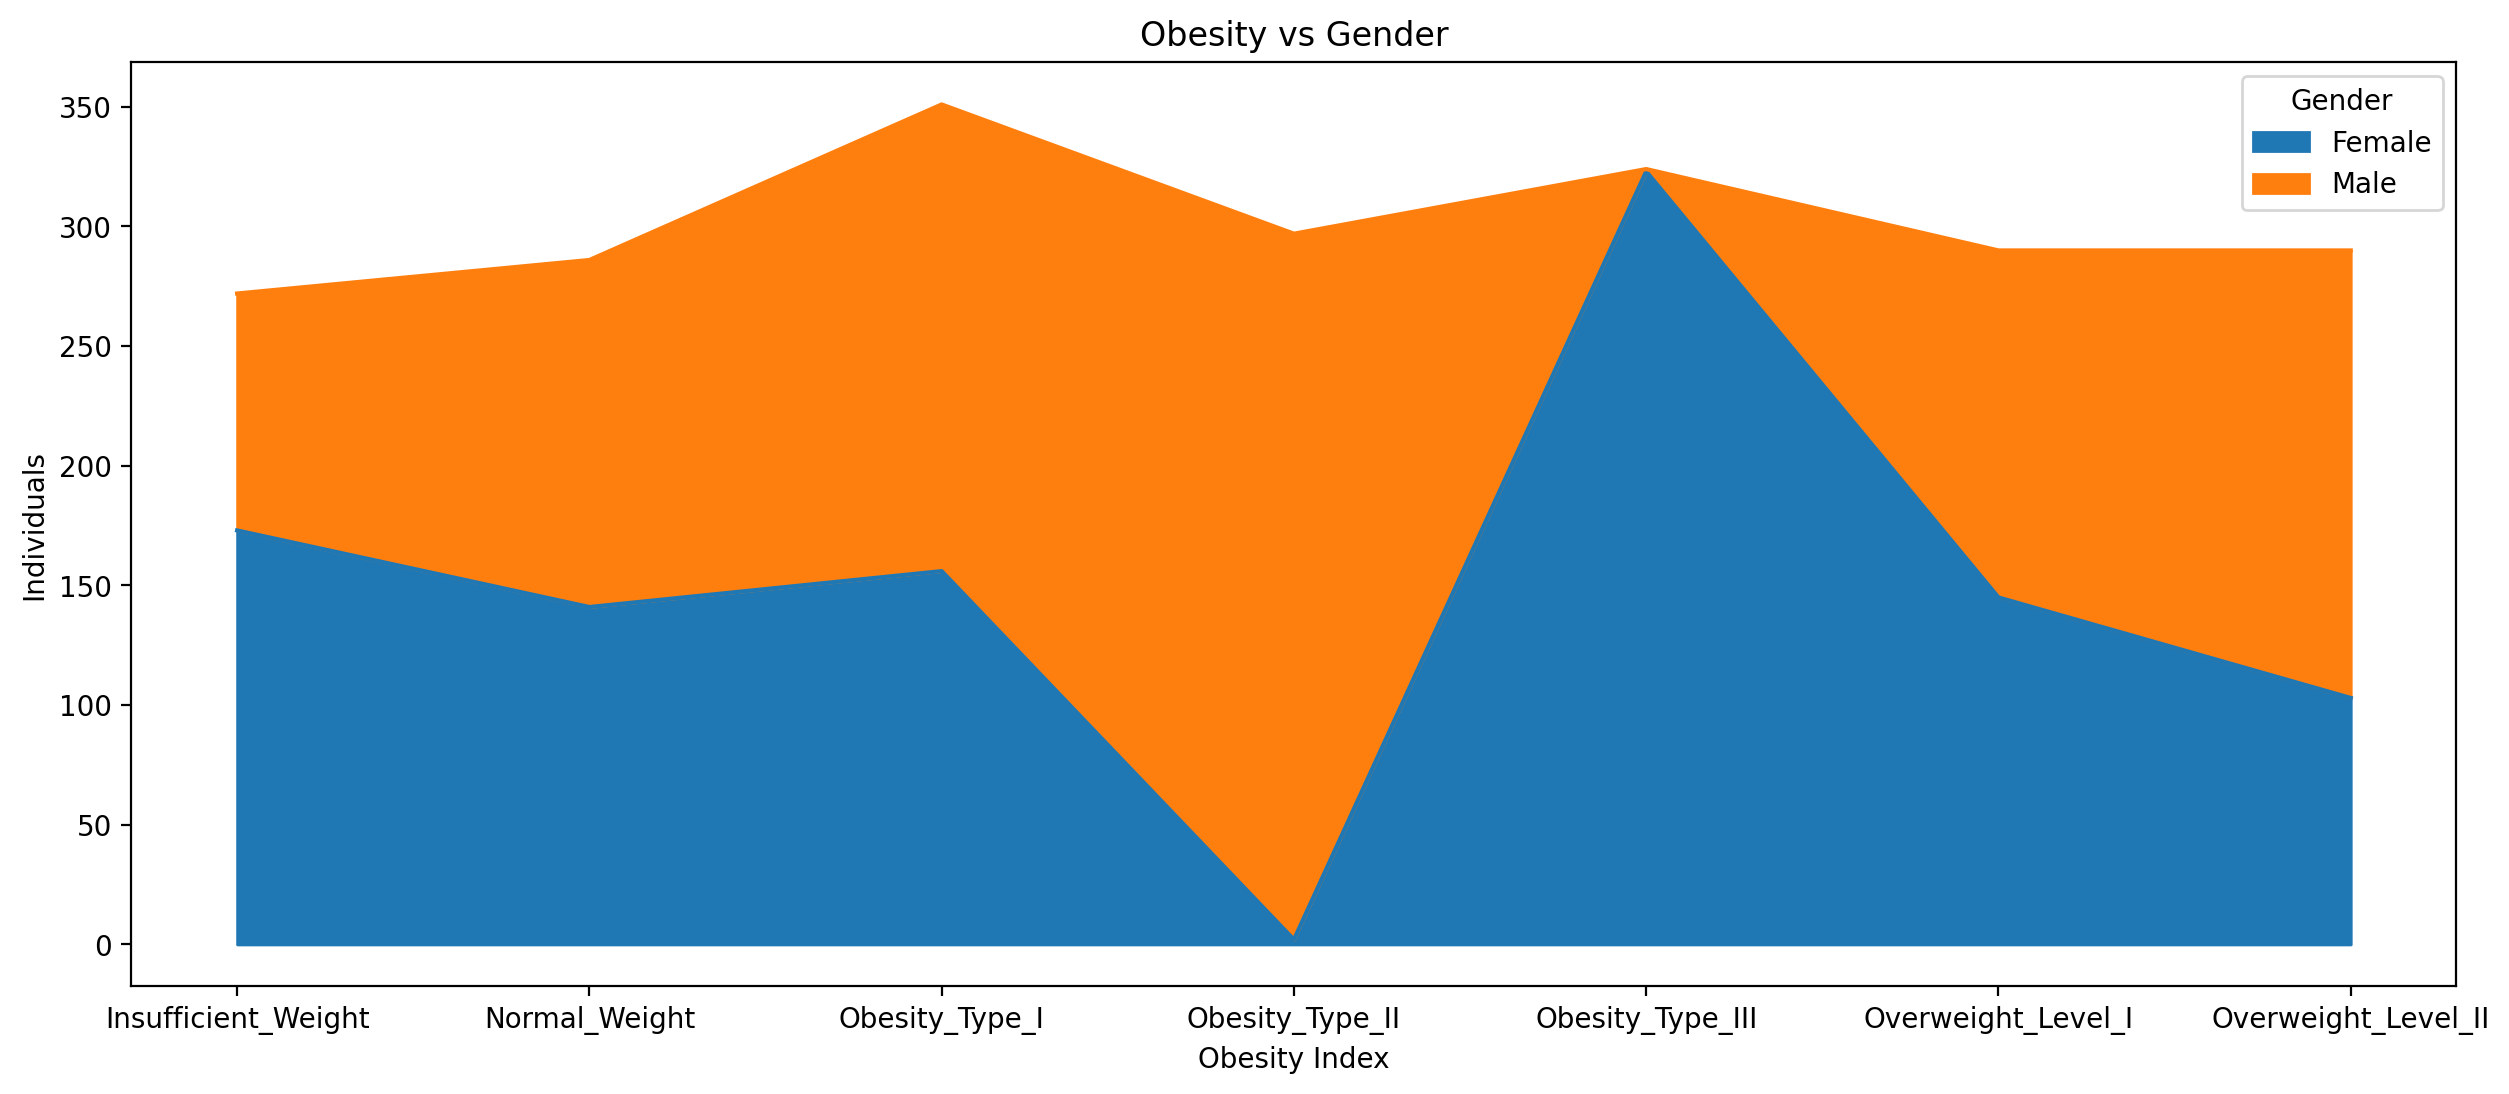

In [20]:
obesityVsGender.plot(xlabel='Obesity Index', ylabel="Individuals", kind="area",title="Obesity vs Gender", label=True)

From the above following can be deducted  
- Obesity Type III is more previlant in Female then Male
- Obesity Type II is more in Male popluation then Female



<Axes: title={'center': 'Family history with obesity of an individual and their NObesity'}, xlabel='Obesity'>

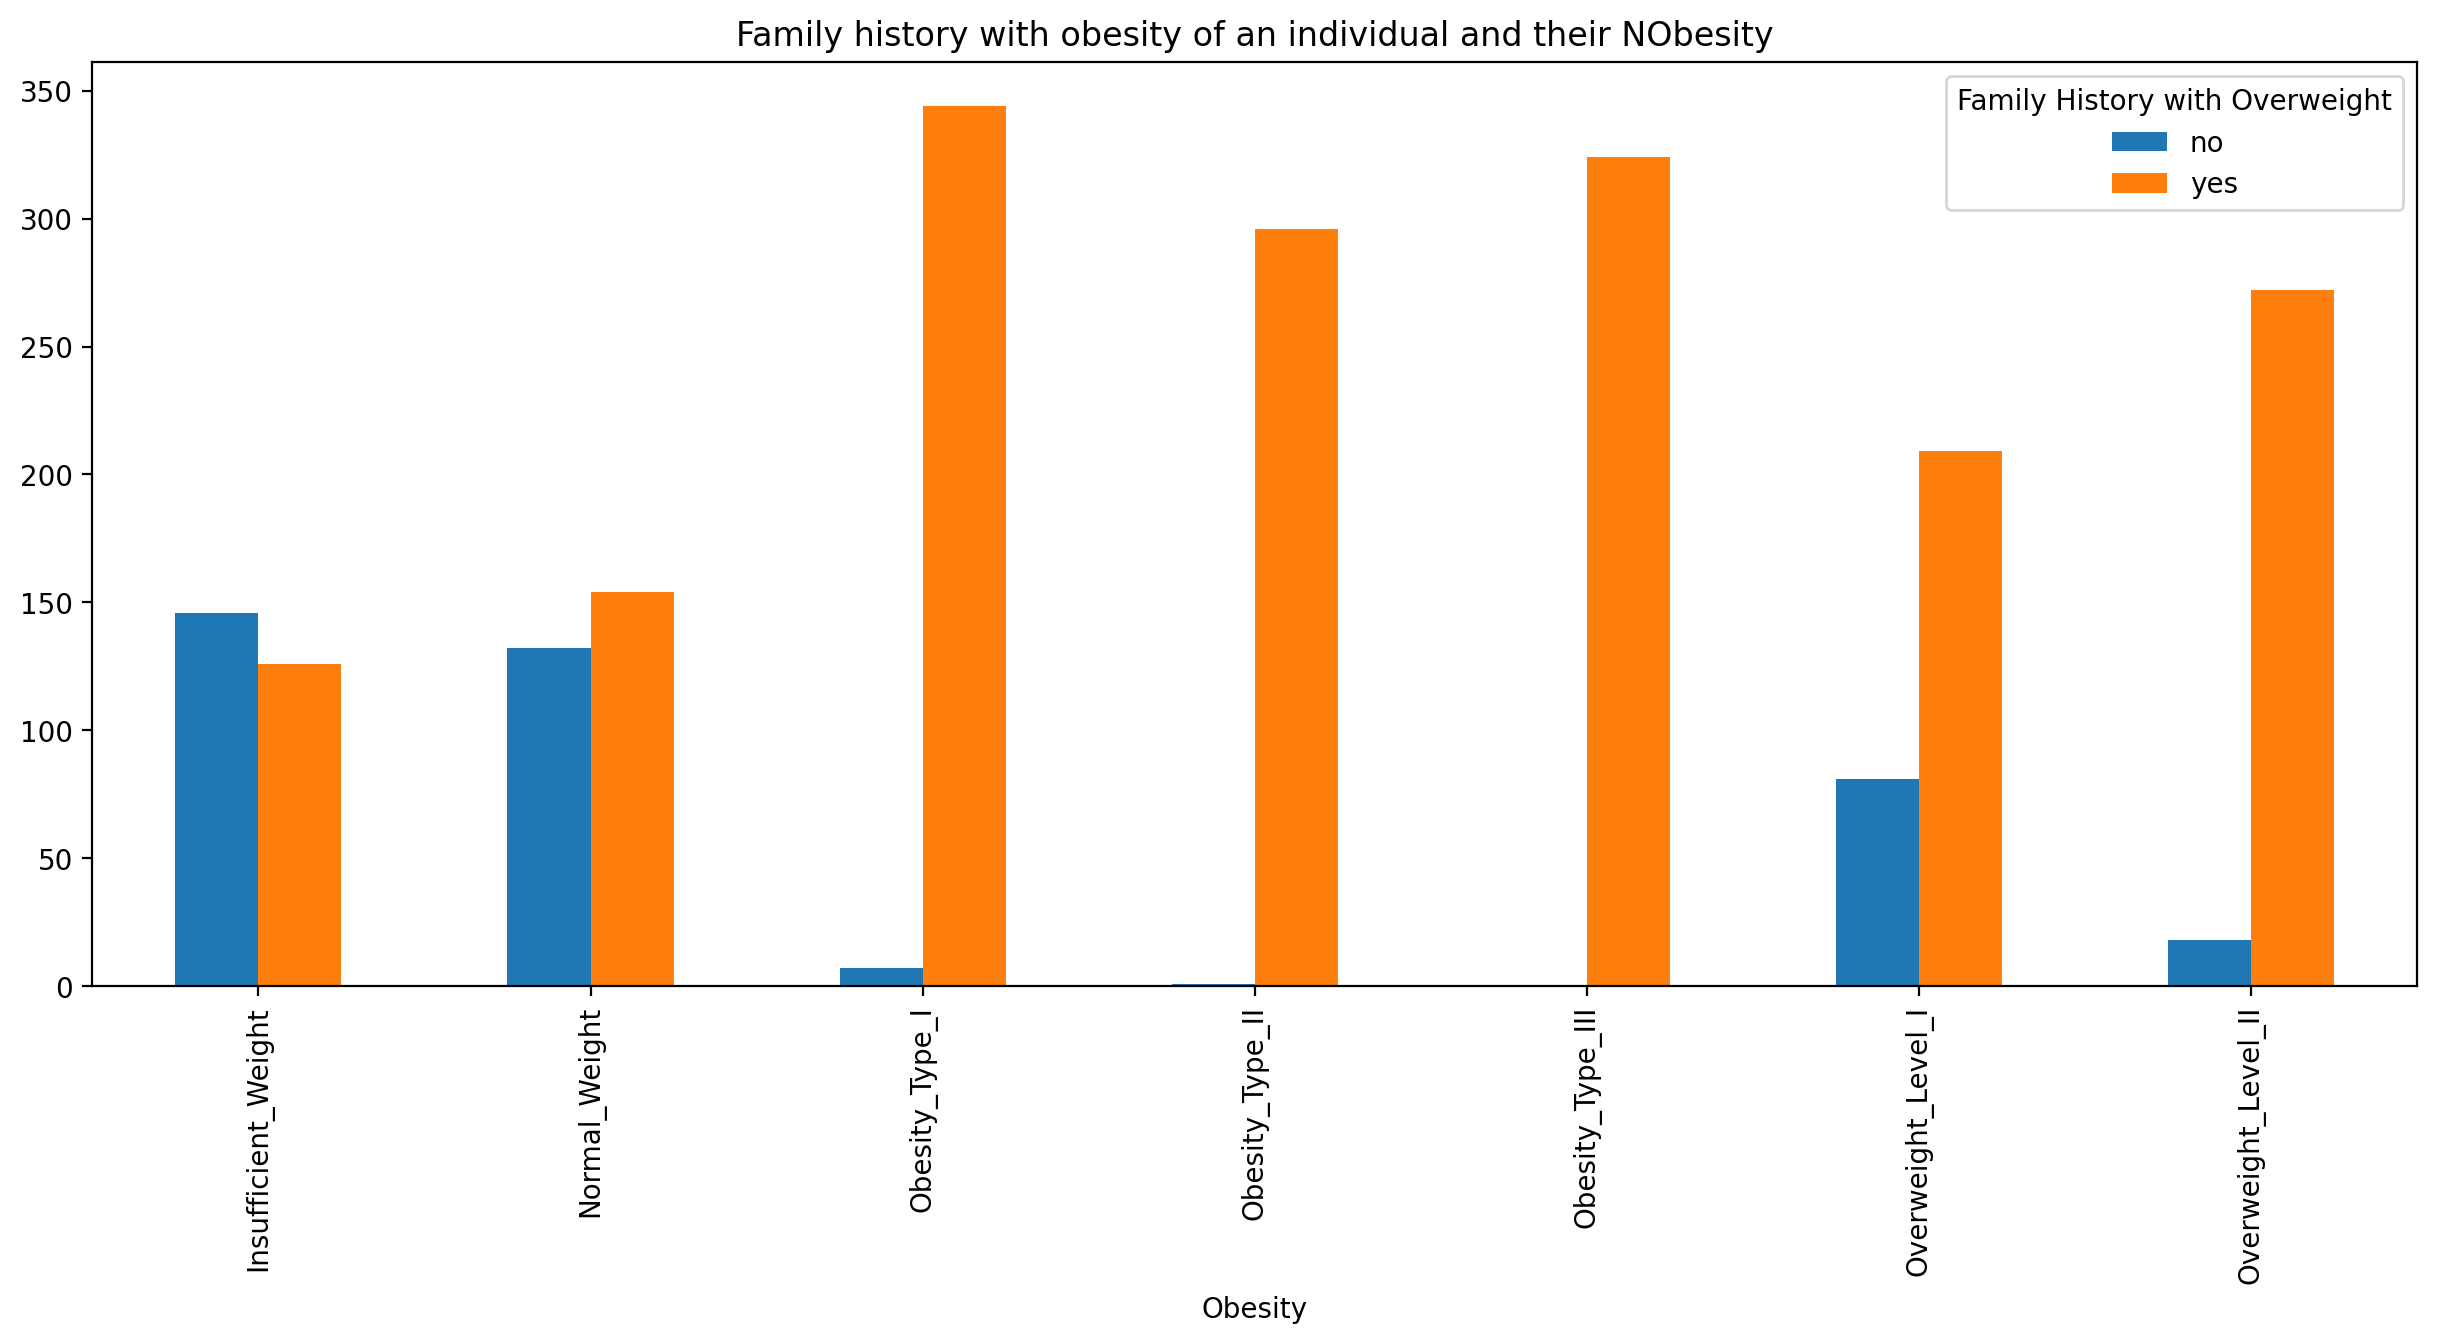

In [21]:
df_n.pivot_table('t',index="Obesity", columns="Family History with Overweight", aggfunc=sum).plot(kind='bar',title="Family history with obesity of an individual and their NObesity")

### Engineering Features

Preparing the features and target column for modeling with appropriate encoding and transformations.

In [22]:
# identify category column data
category = df_clean.dtypes == object

print(category)

# category type is an object 
print(category[category])
category_labels = category[category].index
print('Category variables:', category_labels)

#category type is not an object'
false = category[~category]
not_category_lables = false.index
print('Not a Category variables:', not_category_lables)

Gender                                        True
Age                                          False
Height                                       False
Weight                                       False
Family History with Overweight                True
Frequent consumption of high caloric food     True
Frequency of consumption of vegetables       False
Number of main meals                         False
Consumption of food between meals             True
Smoke                                         True
Consumption of water daily                   False
Calories consumption monitoring               True
Physical activity frequency                  False
Time using technology devices                False
Consumption of alcohol                        True
Transportation used                           True
Obesity                                       True
dtype: bool
Gender                                       True
Family History with Overweight               True
Frequent consumption 

In [23]:
# category variables with more than 2 values
columns = [x for x in category_labels]
multiple = [df_clean[x].unique() for x in category_labels]

multiple_columns = {columns: values for columns, values in zip(columns, multiple) if len(values)>2}
print(multiple_columns)
print('Category variables with 2 or more values:', multiple_columns.keys())

{'Consumption of food between meals': array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object), 'Consumption of alcohol': array(['no', 'Sometimes', 'Frequently'], dtype=object), 'Transportation used': array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object), 'Obesity': array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)}
Category variables with 2 or more values: dict_keys(['Consumption of food between meals', 'Consumption of alcohol', 'Transportation used', 'Obesity'])


In [24]:
df_clean.columns

def column_no(x):
    d = {}
    d[df_clean.columns[x]] = x
    return(d)

print([column_no(x) for x in range(0, len(df_clean.columns))])

[{'Gender': 0}, {'Age': 1}, {'Height': 2}, {'Weight': 3}, {'Family History with Overweight': 4}, {'Frequent consumption of high caloric food': 5}, {'Frequency of consumption of vegetables': 6}, {'Number of main meals': 7}, {'Consumption of food between meals': 8}, {'Smoke': 9}, {'Consumption of water daily': 10}, {'Calories consumption monitoring': 11}, {'Physical activity frequency': 12}, {'Time using technology devices': 13}, {'Consumption of alcohol': 14}, {'Transportation used': 15}, {'Obesity': 16}]


### Train/Test Split

With your data prepared, split it into a train and test set.

In [25]:
x = df_clean[df_clean.columns[:-1]]
y = df_clean['Obesity']

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.25)

In [26]:
# using sklearn.preprocessing .. LabelEncoder to encode to assign the a numerical number to aplhabetical 
# values to y (prediction feature)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_train

array([3, 1, 4, ..., 1, 2, 5])

In [27]:
x_train

Gender  Age  Height  Weight Family History with Overweight  \
1797    Male   26    1.69   102.6                            yes   
330     Male   17    1.74    56.0                            yes   
1935  Female   22    1.66   120.7                            yes   
664   Female   21    1.74    50.5                            yes   
1956  Female   26    1.64   111.9                            yes   
...      ...  ...     ...     ...                            ...   
1599    Male   25    1.66   104.5                            yes   
1610    Male   24    1.83   121.0                            yes   
5       Male   29    1.62    53.0                             no   
1427    Male   21    1.74    98.2                            yes   
874   Female   16    1.64    67.4                            yes   

     Frequent consumption of high caloric food  \
1797                                       yes   
330                                        yes   
1935                                       yes   
664                                        yes   
1956                                       yes   
...                                        ...   
1599                                       yes   
1610                                       yes   
5                                          yes   
1427                                       yes   
874                                        yes   

      Frequency of consumption of vegetables  Number of main meals  \
1797                                       2                     1   
330                                        2                     3   
1935                                       3                     3   
664                                        3                     3   
1956                                       3                     3   
...                                      ...                   ...   
1599                                       2                     1   
1610                                       2                     3   
5                                          2                     3   
1427                                       2                     2   
874                                        1                     1   

     Consumption of food between meals Smoke  Consumption of water daily  \
1797                         Sometimes    no                           1   
330                          Sometimes    no                           2   
1935                         Sometimes    no                           1   
664                         Frequently    no                           1   
1956                         Sometimes    no                           2   
...                                ...   ...                         ...   
1599                         Sometimes    no                           1   
1610                         Sometimes    no                           2   
5                            Sometimes    no                           2   
1427                         Sometimes    no                           2   
874                          Sometimes    no                           1   

     Calories consumption monitoring  Physical activity frequency  \
1797                              no                            0   
330                               no                            2   
1935                              no                            0   
664                               no                            0   
1956                              no                            0   
...                              ...                          ...   
1599                              no                            0   
1610                              no                            2   
5                                 no                            0   
1427                              no                            2   
874                              yes                            0   

     

In [28]:
# creating Pipelines
Scale_features = ['Age', 'Height', 'Weight']
Scale_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('Scaling', StandardScaler())
])

Ordi_features = ["Consumption of food between meals", 'Consumption of alcohol']
Ordi_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('Ordi', OrdinalEncoder())
])

NonO_features = ['Gender', 'Family History with Overweight', 'Frequent consumption of high caloric food', 'Smoke', 'Calories consumption monitoring', 'Transportation used']
NonO_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('Non-O', OneHotEncoder(handle_unknown='ignore'))
])

Preprocessor = ColumnTransformer(transformers=[
    ('Scale', Scale_transformer, Scale_features),
    ('Ordinal', Ordi_transformer, Ordi_features),
    ('Non-Ordinal', NonO_transformer, NonO_features)
], remainder = 'passthrough')
    
pipeline_class = Pipeline(steps=[('preprocessor', Preprocessor)])

In [29]:
pipeline_class.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Scale',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scaling',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight']),
                                                 ('Ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('Ordi',
                                                                   OrdinalEncoder())]),
                                                  ['Consumption of food '
                                                   'between meals',
                                                   'Consumption of alcohol']),
                                                 ('Non-Ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('Non-O',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'Family History with '
                                                   'Overweight',
                                                   'Frequent consumption of '
                                                   'high caloric food',
                                                   'Smoke',
                                                   'Calories consumption '
                                                   'monitoring',
                                                   'Transportation used'])]))])

In [30]:
transform_df = pipeline_class.fit_transform(x_train)
print(transform_df.shape)

(1582, 25)


In [31]:
# Column name of first two steps in pipeline

cols = [y for x in [Scale_features, Ordi_features] for y in x]
cols

['Age',
 'Height',
 'Weight',
 'Consumption of food between meals',
 'Consumption of alcohol']

In [32]:
# Column names of OneHotEncoder step in pipeline

oneHotEncoding_cols = pipeline_class.named_steps['preprocessor'].transformers_[2][1].named_steps['Non-O'].get_feature_names_out(NonO_features)
oneHotEncoding_cols = [x for x in oneHotEncoding_cols]
oneHotEncoding_cols

['Gender_Female',
 'Gender_Male',
 'Family History with Overweight_no',
 'Family History with Overweight_yes',
 'Frequent consumption of high caloric food_no',
 'Frequent consumption of high caloric food_yes',
 'Smoke_no',
 'Smoke_yes',
 'Calories consumption monitoring_no',
 'Calories consumption monitoring_yes',
 'Transportation used_Automobile',
 'Transportation used_Bike',
 'Transportation used_Motorbike',
 'Transportation used_Public_Transportation',
 'Transportation used_Walking']

In [33]:
transformed_x_train = pd.DataFrame(transform_df, columns= ['Age', 'Height',
 'Weight',
 'Consumption of food between meals',
 'Consumption of alcohol','Gender_Female',
 'Gender_Male',
 'Family History with Overweight_no',
 'Family History with Overweight_yes',
 'Frequent consumption of high caloric food_no',
 'Frequent consumption of high caloric food_yes',
 'Smoke_no',
 'Smoke_yes',
 'Calories consumption monitoring_no',
 'Calories consumption monitoring_yes',
 'Transportation used_Automobile',
 'Transportation used_Bike',
 'Transportation used_Motorbike',
 'Transportation used_Public Transportation',
 'Transportation used_Walking', 'Frequency of consumption of vegetables',
 'Number of main meals',
 'Consumption of water daily',
 'Physical activity frequency',
 'Time using technology devices'])

In [34]:
transformed_x_train

Age    Height    Weight  Consumption of food between meals  \
0     0.345120 -0.122557  0.595191                                2.0   
1    -1.118634  0.410681 -1.182118                                2.0   
2    -0.305437 -0.442500  1.285520                                2.0   
3    -0.468076  0.410681 -1.391886                                1.0   
4     0.345120 -0.655795  0.949890                                2.0   
...        ...       ...       ...                                ...   
1577  0.182481 -0.442500  0.667657                                2.0   
1578  0.019842  1.370509  1.296961                                2.0   
1579  0.833038 -0.869090 -1.296537                                2.0   
1580 -0.468076  0.410681  0.427377                                2.0   
1581 -1.281273 -0.655795 -0.747326                                2.0   

      Consumption of alcohol  Gender_Female  Gender_Male  \
0                        2.0            0.0          1.0   
1                        2.0            0.0          1.0   
2                        1.0            1.0          0.0   
3                        2.0            1.0          0.0   
4                        1.0            1.0          0.0   
...                      ...            ...          ...   
1577                     2.0            0.0          1.0   
1578                     1.0            0.0          1.0   
1579                     1.0            0.0          1.0   
1580                     2.0            0.0          1.0   
1581                     2.0            1.0          0.0   

      Family History with Overweight_no  Family History with Overweight_yes  \
0                                   0.0                                 1.0   
1                                   0.0                                 1.0   
2                                   0.0                                 1.0   
3                                   0.0                                 1.0   
4                                   0.0                                 1.0   
...                                 ...                                 ...   
1577                                0.0                                 1.0   
1578                                0.0                                 1.0   
1579                                1.0                                 0.0   
1580                                0.0                                 1.0   
1581                                0.0                                 1.0   

      Frequent consumption of high caloric food_no  ...  \
0                                              0.0  ...   
1                                              0.0  ...   
2                                              0.0  ...   
3                                              0.0  ...   
4                                              0.0  ...   
...                                            ...  ...   
1577                                           0.0  ...   
1578                                           0.0  ...   
1579                                           0.0  ...   
1580                                           0.0  ...   
1581                                           0.0  ...   

      Transportation used_Automobile  Transportation used_Bike  \
0                                0.0                       0.0   
1                                0.0                       0.0   
2                                0.0                       0.0   
3                                0.0                       0.0   
4                                0.0                       0.0   
...                              ...                       ...   
1577                             0.0                       0.0   
1578                             0.0                       0.0   
1579                             1.0                       0.0   
1580                             0.0                       0.0   
1581                         

In [35]:
# label encoding 
le = LabelEncoder()
y_test = le.fit_transform(y_test)
le_name_mapping = dict(zip(le.transform(le.classes_), le.classes_))
print(le_name_mapping)

{0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Obesity_Type_I', 3: 'Obesity_Type_II', 4: 'Obesity_Type_III', 5: 'Overweight_Level_I', 6: 'Overweight_Level_II'}


In [36]:
#running Accuracy report
classifiers = [
    KNeighborsClassifier(n_neighbors = 5),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    SGDClassifier()
    ]

top_class = []

for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', Preprocessor),
                      ('classifier', classifier)])
    
    # training model
    pipe.fit(x_train, y_train)   
    print(classifier)
    
    acc_score = pipe.score(x_test, y_test)
    print("model score: %.3f" % acc_score)
    
    # using the model to predict
    y_pred = pipe.predict(x_test)
    
    target_names = [le_name_mapping[x] for x in le_name_mapping]
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    if acc_score > 0.8:
        top_class.append(classifier)

KNeighborsClassifier()
model score: 0.854
                     precision    recall  f1-score   support

Insufficient_Weight       0.77      0.95      0.85        64
      Normal_Weight       0.82      0.62      0.71        85
     Obesity_Type_I       0.86      0.93      0.89        89
    Obesity_Type_II       0.95      0.96      0.95        73
   Obesity_Type_III       0.99      1.00      0.99        69
 Overweight_Level_I       0.76      0.77      0.76        81
Overweight_Level_II       0.87      0.79      0.83        67

           accuracy                           0.85       528
          macro avg       0.86      0.86      0.86       528
       weighted avg       0.85      0.85      0.85       528

SVC(C=0.025, probability=True)
model score: 0.492
                     precision    recall  f1-score   support

Insufficient_Weight       0.52      0.92      0.67        64
      Normal_Weight       0.00      0.00      0.00        85
     Obesity_Type_I       0.28      0.87      0.43

/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.95      0.95        64
      Normal_Weight       0.89      0.88      0.89        85
     Obesity_Type_I       0.93      0.92      0.93        89
    Obesity_Type_II       1.00      0.93      0.96        73
   Obesity_Type_III       0.99      1.00      0.99        69
 Overweight_Level_I       0.90      0.89      0.89        81
Overweight_Level_II       0.86      0.94      0.90        67

           accuracy                           0.93       528
          macro avg       0.93      0.93      0.93       528
       weighted avg       0.93      0.93      0.93       528

RandomForestClassifier()
model score: 0.939
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.92      0.96        64
      Normal_Weight       0.80      0.96      0.88        85
     Obesity_Type_I       1.00      0.96      0.98        89
    Obesity_Type_II       1.00      0

/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GradientBoostingClassifier()
model score: 0.953
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.95      0.94        64
      Normal_Weight       0.94      0.92      0.93        85
     Obesity_Type_I       0.96      0.99      0.97        89
    Obesity_Type_II       0.99      0.96      0.97        73
   Obesity_Type_III       1.00      1.00      1.00        69
 Overweight_Level_I       0.95      0.90      0.92        81
Overweight_Level_II       0.91      0.96      0.93        67

           accuracy                           0.95       528
          macro avg       0.95      0.95      0.95       528
       weighted avg       0.95      0.95      0.95       528

SGDClassifier()
model score: 0.697
                     precision    recall  f1-score   support

Insufficient_Weight       0.86      0.97      0.91        64
      Normal_Weight       0.84      0.42      0.56        85
     Obesity_Type_I       0.63      0.46      0.53        8

In [37]:
ada_param = {'n_estimators':[50,100,200,500,1000,2000],
             'learning_rate':[.001,0.01,.1],
             'algorithm':['SAMME', 'SAMME.R'], 
             'random_state':[0,1,3,None]}

In [38]:
grid_ada = GridSearchCV(AdaBoostClassifier(), ada_param)
grid_ada.fit(transformed_x_train, y_train)
print(grid_ada.best_score_)
grid_ada.best_params_

0.48797668011021045


{'algorithm': 'SAMME',
 'learning_rate': 0.1,
 'n_estimators': 500,
 'random_state': 0}

In [40]:
forest_param = {'n_estimators': [5, 10, 30, 50, 100, 200, 500],
                'max_features': ['auto', 'sqrt', 'log2', None],
                'max_depth' : [1,3,4,5,6,7,8,None],
                'criterion' :['gini', 'entropy']}

In [41]:
grid_forest = GridSearchCV(RandomForestClassifier(), forest_param)
grid_forest.fit(transformed_x_train, y_train)
print(grid_forest.best_score_)
grid_forest.best_params_

/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

/Users/Sheikh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.9664956275206645


{'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'n_estimators': 500}